# Desafio Titanic 🚢
Baseado no conjunto de dados Titanic, o desafio é encontrar um conjunto de regras para preencher uma nova colunada chamada "predicao", de modo similar ao conteúdo da coluna Survived.

In [56]:
#Importação das bibliotecas e arquivo.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic.data')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
#Descrição das colunas com valores numéricos.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Por esse dados, percebe-se que há alguns valores de idade faltando, pois são 891 linhas e apenas 714 registros. Sendo assim, 177 idades não foram catalogadas.

In [3]:
#Substituindo os "NaN" das idades por valores aleatórios entre a média - desvio padrão e média + desvio padrão: 
media = titanic["Age"].mean()
desvp = titanic["Age"].std()
nulos = titanic["Age"].isnull().sum()
i_aleatoria = np.random.randint(media - desvp, media + desvp, size = nulos)
i_preench = titanic["Age"].copy()
i_preench[np.isnan(i_preench)] = i_aleatoria
titanic["Age"] = i_preench
titanic["Age"] = titanic["Age"].astype(int)

Em relação aos dados não númericos, é preciso analisar se há colunas com muitos valores ausentes.

In [4]:
#Verificação dos "NaN" nas seguintes colunas:
nomes_ausentes = titanic.Name.isnull().sum()
sexos_ausentes = titanic.Sex.isnull().sum()
tickets_ausentes = titanic.Ticket.isnull().sum()
cabines_ausentes = titanic.Cabin.isnull().sum()
embarques_ausentes = titanic.Embarked.isnull().sum()

nomes_ausentes, sexos_ausentes, tickets_ausentes, cabines_ausentes, embarques_ausentes

(0, 0, 0, 687, 2)

Percebe-se que há muitos dados de cabine faltando, por isso, não serão utilizados.

Ao pensar-se de maneira lógica e como alguém sem acesso aos dados, parece não haver influência dos nomes e Ids sobre suas chances se sobreviverem, e os dados de tickets e tarifas já estão implícitos nos de classe. Por esses motivos não serão consideradas essas colunas.

Desse modo, serão analisados apenas: classe, sexo, idade, número de irmãos e cônjuges que viajam com o passageiro, número de pais e filhos viajando com o passageiro, e os locais de embarcação (Southampton = S, Queenstown = Q, Cherbourg = C).

Inicialmente, será avaliado o parâmetro classe:

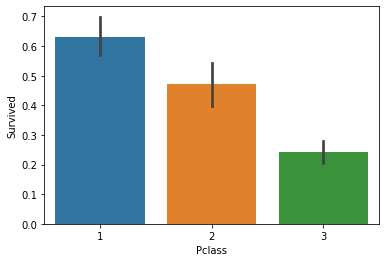

In [5]:
#Gráfico com a porcentagem de cada classe que sobreviveu.
sns.barplot(x='Pclass', y='Survived', data=titanic);

<AxesSubplot:xlabel='Pclass', ylabel='count'>

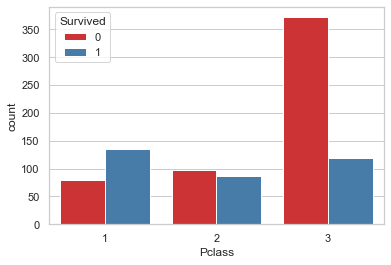

In [6]:
#Gráfico em valores absolutos.
sns.set(style="whitegrid")
sns.countplot( x='Pclass', data=titanic, hue="Survived", palette="Set1")

Observa-se que a classe 3 teve a menor taxa de sobrevivência e a maior quantidade de óbitos, enquanto a classe 1 apresentou resultados opostos. Já a classe 2 mostrou uma porcentagem de quase 50% de sobreviventes.

Posteriormente, a categória sexo:

In [7]:
#Porcentagem de homens que sobreviveram:
homens_s = titanic.loc[titanic.Sex == 'male']['Survived']
porcent_h_s = sum(homens_s)/len(homens_s)
print(sum(homens_s))
print(len(homens_s))
porcent_h_s

109
577


0.18890814558058924

In [8]:
#Porcentagem de mulheres que sobreviveram:
mulheres_s = titanic.loc[titanic.Sex == 'female']['Survived']
porcent_m_s = sum(mulheres_s)/len(mulheres_s)
print(sum(mulheres_s))
print(len(mulheres_s))
porcent_m_s

233
314


0.7420382165605095

Concluí-se que o número de mulheres sobreviventes foi muito maior do que o dos homens.

Adiante, a coluna idade:

C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

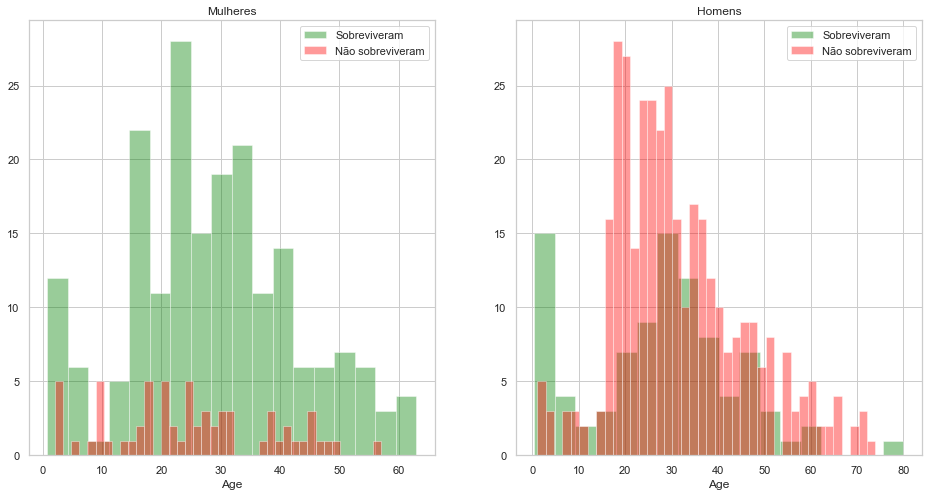

In [61]:
#Gráficos comparando as idades sobreviventes ou não, por sexo:
sobreviveram = 'Sobreviveram'
n_sobreviveram = 'Não sobreviveram'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
mulheres = titanic[titanic['Sex']=='female']
homens = titanic[titanic['Sex']=='male']
ax = sns.distplot(mulheres[mulheres['Survived']==1].Age.dropna(), bins=18, label = sobreviveram, ax = axes[0], kde =False, color="green")
ax = sns.distplot(mulheres[mulheres['Survived']==0].Age.dropna(), bins=40, label = n_sobreviveram, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Mulheres')
ax = sns.distplot(homens[homens['Survived']==1].Age.dropna(), bins=18, label = sobreviveram, ax = axes[1], kde = False, color="green")
ax = sns.distplot(homens[homens['Survived']==0].Age.dropna(), bins=40, label = n_sobreviveram, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Homens');

Entende-se que as pessoas mais jovens tem maior chance de sobreviverem. Isso, comparando-se com o gênero, corrobora com a conduta de "mulheres e crianças primeiro". No caso dos homens, há uma concentração maior de sobreviventes ao redor de 30 anos.

Depois, o número de irmãos, cônjuges, pais e filhos viajando com o passageiro, dados que podem sem agrupados em uma coluna "Parentes":

C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


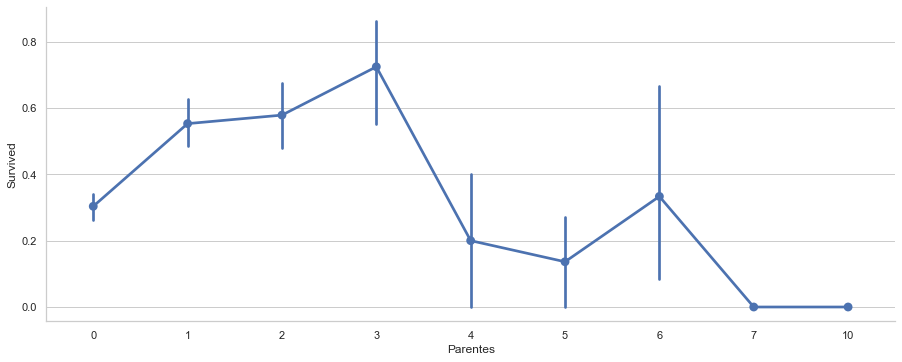

In [63]:
#Criando a coluna "Parentes":
titanic['Parentes'] = ''
titanic['Parentes'] = titanic['SibSp'] + titanic['Parch']

#Gráfico que relaciona a quantidade de parentes e sobreviventes:
axes = sns.factorplot('Parentes','Survived', data=titanic, aspect = 2.5,);

Infere-se que se a pessoa tem de 1 a 3 parentes a bordo, ela tem maiores chances de sobreviver.

Por fim, os locais de embarcação:

C:\Users\Microsoft\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


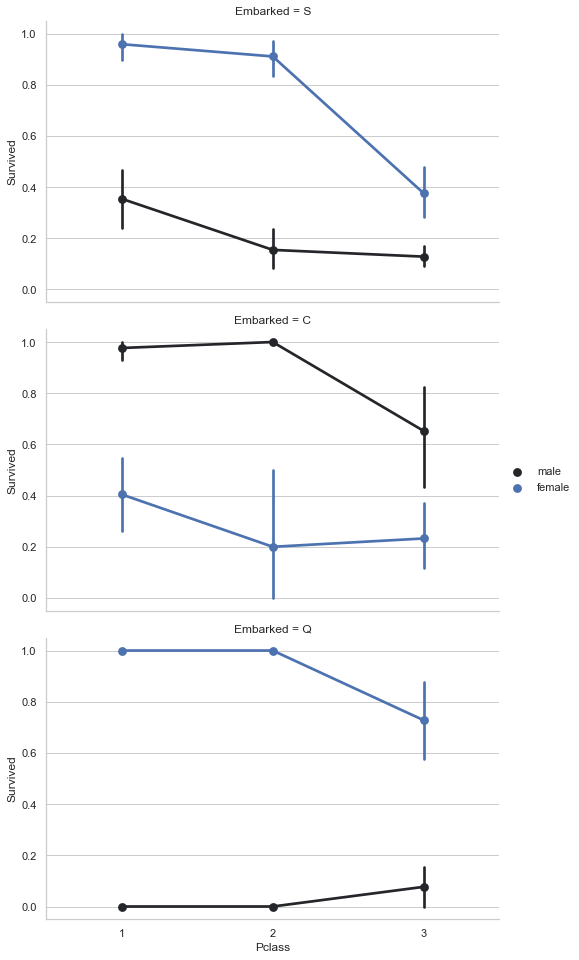

In [11]:
#Gráfico que relaciona os sobreviventes, sexo, classe e local de embarque:
FacetGrid = sns.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None )
FacetGrid.add_legend();

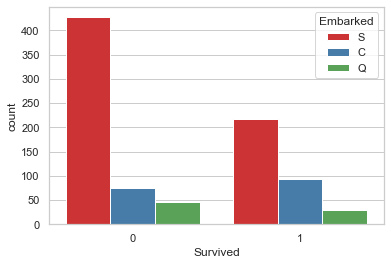

In [57]:
#Gráfico que relaciona a quantidade de sobreviventes por local de embarque:
sns.set(style="whitegrid")
sns.countplot( x='Survived', data=titanic, hue="Embarked", palette="Set1");

In [58]:
#Porcentagem de passageiros do porto S que sobreviveram:
s_s = titanic.loc[titanic.Embarked == 'S']['Survived']
porcent_s_s = sum(s_s)/len(s_s)
print(sum(s_s))
print(len(s_s))
porcent_s_s

217
644


0.33695652173913043

In [59]:
#Porcentagem de passageiros do porto C que sobreviveram:
c_s = titanic.loc[titanic.Embarked == 'C']['Survived']
porcent_c_s = sum(c_s)/len(c_s)
print(sum(c_s))
print(len(c_s))
porcent_c_s

93
168


0.5535714285714286

In [60]:
#Porcentagem de passageiros do porto Q que sobreviveram:
q_s = titanic.loc[titanic.Embarked == 'Q']['Survived']
porcent_q_s = sum(q_s)/len(q_s)
print(sum(q_s))
print(len(q_s))
porcent_q_s

30
77


0.38961038961038963

Compreende-se que se uma mulher embarcou no portos S ou Q ela tem grandes chances de sobreviver. Por outro lado, homens que embarcaram no porto C sobreviveram mais do que as mulheres. De uma maneira geral, o porto S tem a menor taxa de sobrevivência e o C a maior.

Sendo assim, segue as leis para preencher a coluna "predicao":

In [64]:
#Leis de sobrevivência:
titanic['predicao']='0'
titanic['predicao'][(titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'Q')]=1
titanic['predicao'][(titanic['Pclass'] == 2) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'Q')]=1
titanic['predicao'][(titanic['Pclass'] == 3) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'Q') & (titanic['Parentes']>=1) & (titanic['Parentes']<=3)]=1
titanic['predicao'][(titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'C') & (titanic['Parentes']>=1) & (titanic['Parentes']<=3)]=1
titanic['predicao'][(titanic['Pclass'] == 2) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'C') & (titanic['Parentes']>=1) & (titanic['Parentes']<=3)]=1
titanic['predicao'][(titanic['Pclass'] == 3) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'C') & (titanic['Parentes']>=1) & (titanic['Parentes']<=3)]=1
titanic['predicao'][(titanic['Pclass'] == 1) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'C')]=1
titanic['predicao'][(titanic['Pclass'] == 2) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'C')]=1
titanic['predicao'][(titanic['Pclass'] == 3) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'C') & (titanic['Age'] <=10)]=1
titanic['predicao'][(titanic['Pclass'] == 3) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'C') & (titanic['Age'] >=26) & (titanic['Age'] <=28)]=1
titanic['predicao'][(titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'S')]=1
titanic['predicao'][(titanic['Pclass'] == 2) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'S') & (titanic['Age'] !=10) & (titanic['Age'] !=9)]=1
titanic['predicao'][(titanic['Pclass'] == 3) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'S') & (titanic['Parentes']>=1) & (titanic['Parentes']<=3)]=1
titanic['predicao'][(titanic['Pclass'] == 1) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'S') & (titanic['Age'] <=10)]=1
titanic['predicao'][(titanic['Pclass'] == 1) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'S') & (titanic['Age'] >=26) & (titanic['Age'] <=28)]=1


titanic['predicao'] = pd.to_numeric(titanic['predicao'])
(titanic['Survived'] == titanic['predicao']).sum()/len(titanic)

<ipython-input-64-026a7f3bb44e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['predicao'][(titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'Q')]=1
<ipython-input-64-026a7f3bb44e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['predicao'][(titanic['Pclass'] == 2) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'Q')]=1
<ipython-input-64-026a7f3bb44e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

0.7598204264870931